# **Importing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# **Importing and Reading the dataset**

In [2]:
# This dataset contains information about used cars listed on www.cardekho.com

# df = pd.read_csv()
df = pd.read_csv('/content/car_data.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# **Data Preprocessing**

1. Checking the shape

In [4]:
df.shape

(4340, 8)

2. Checking the unique values in the Categorical columns

In [6]:
# print(df['fuel'].unique())
# print(df['seller_type'].unique())
# print(df['transmission'].unique())
# print(df['owner'].unique())


print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


3. Checking the null values

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

4. Addiional Details

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


5. Creating a new dataset having relevent features

In [10]:
# new_data = df.drop("name",axis=1)
# new_data.head()

new_data = df.drop("name",axis=1)
new_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


6. Creating a new feature that tells how old the car is w.r.t the current year i.e.,2020

In [11]:
new_data["current_year"] = 2020
new_data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2020
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2020
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2020
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2020
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2020


In [14]:
# new_data["no_of_years"] = new_data['current_year'] - new_data['year']
# new_data = new_data.drop(["year","current_year"], axis=1)
# new_data.head()


new_data["no_of_years"] = new_data['current_year'] - new_data['year']
new_data = new_data.drop(["year","current_year"], axis=1)
new_data.head()


,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


7. Since there are categorial features, we use pandas get_dummies() function to covert it into numberical features

In [15]:
new_data = pd.get_dummies(new_data, drop_first=True)
new_data.head()

,selling_price,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [16]:
new_data.shape

(4340, 14)

8. Checking the relevency of the features uing Correlation and Sns Heatmap

In [17]:
new_data.corr()

,selling_price,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_of_years,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


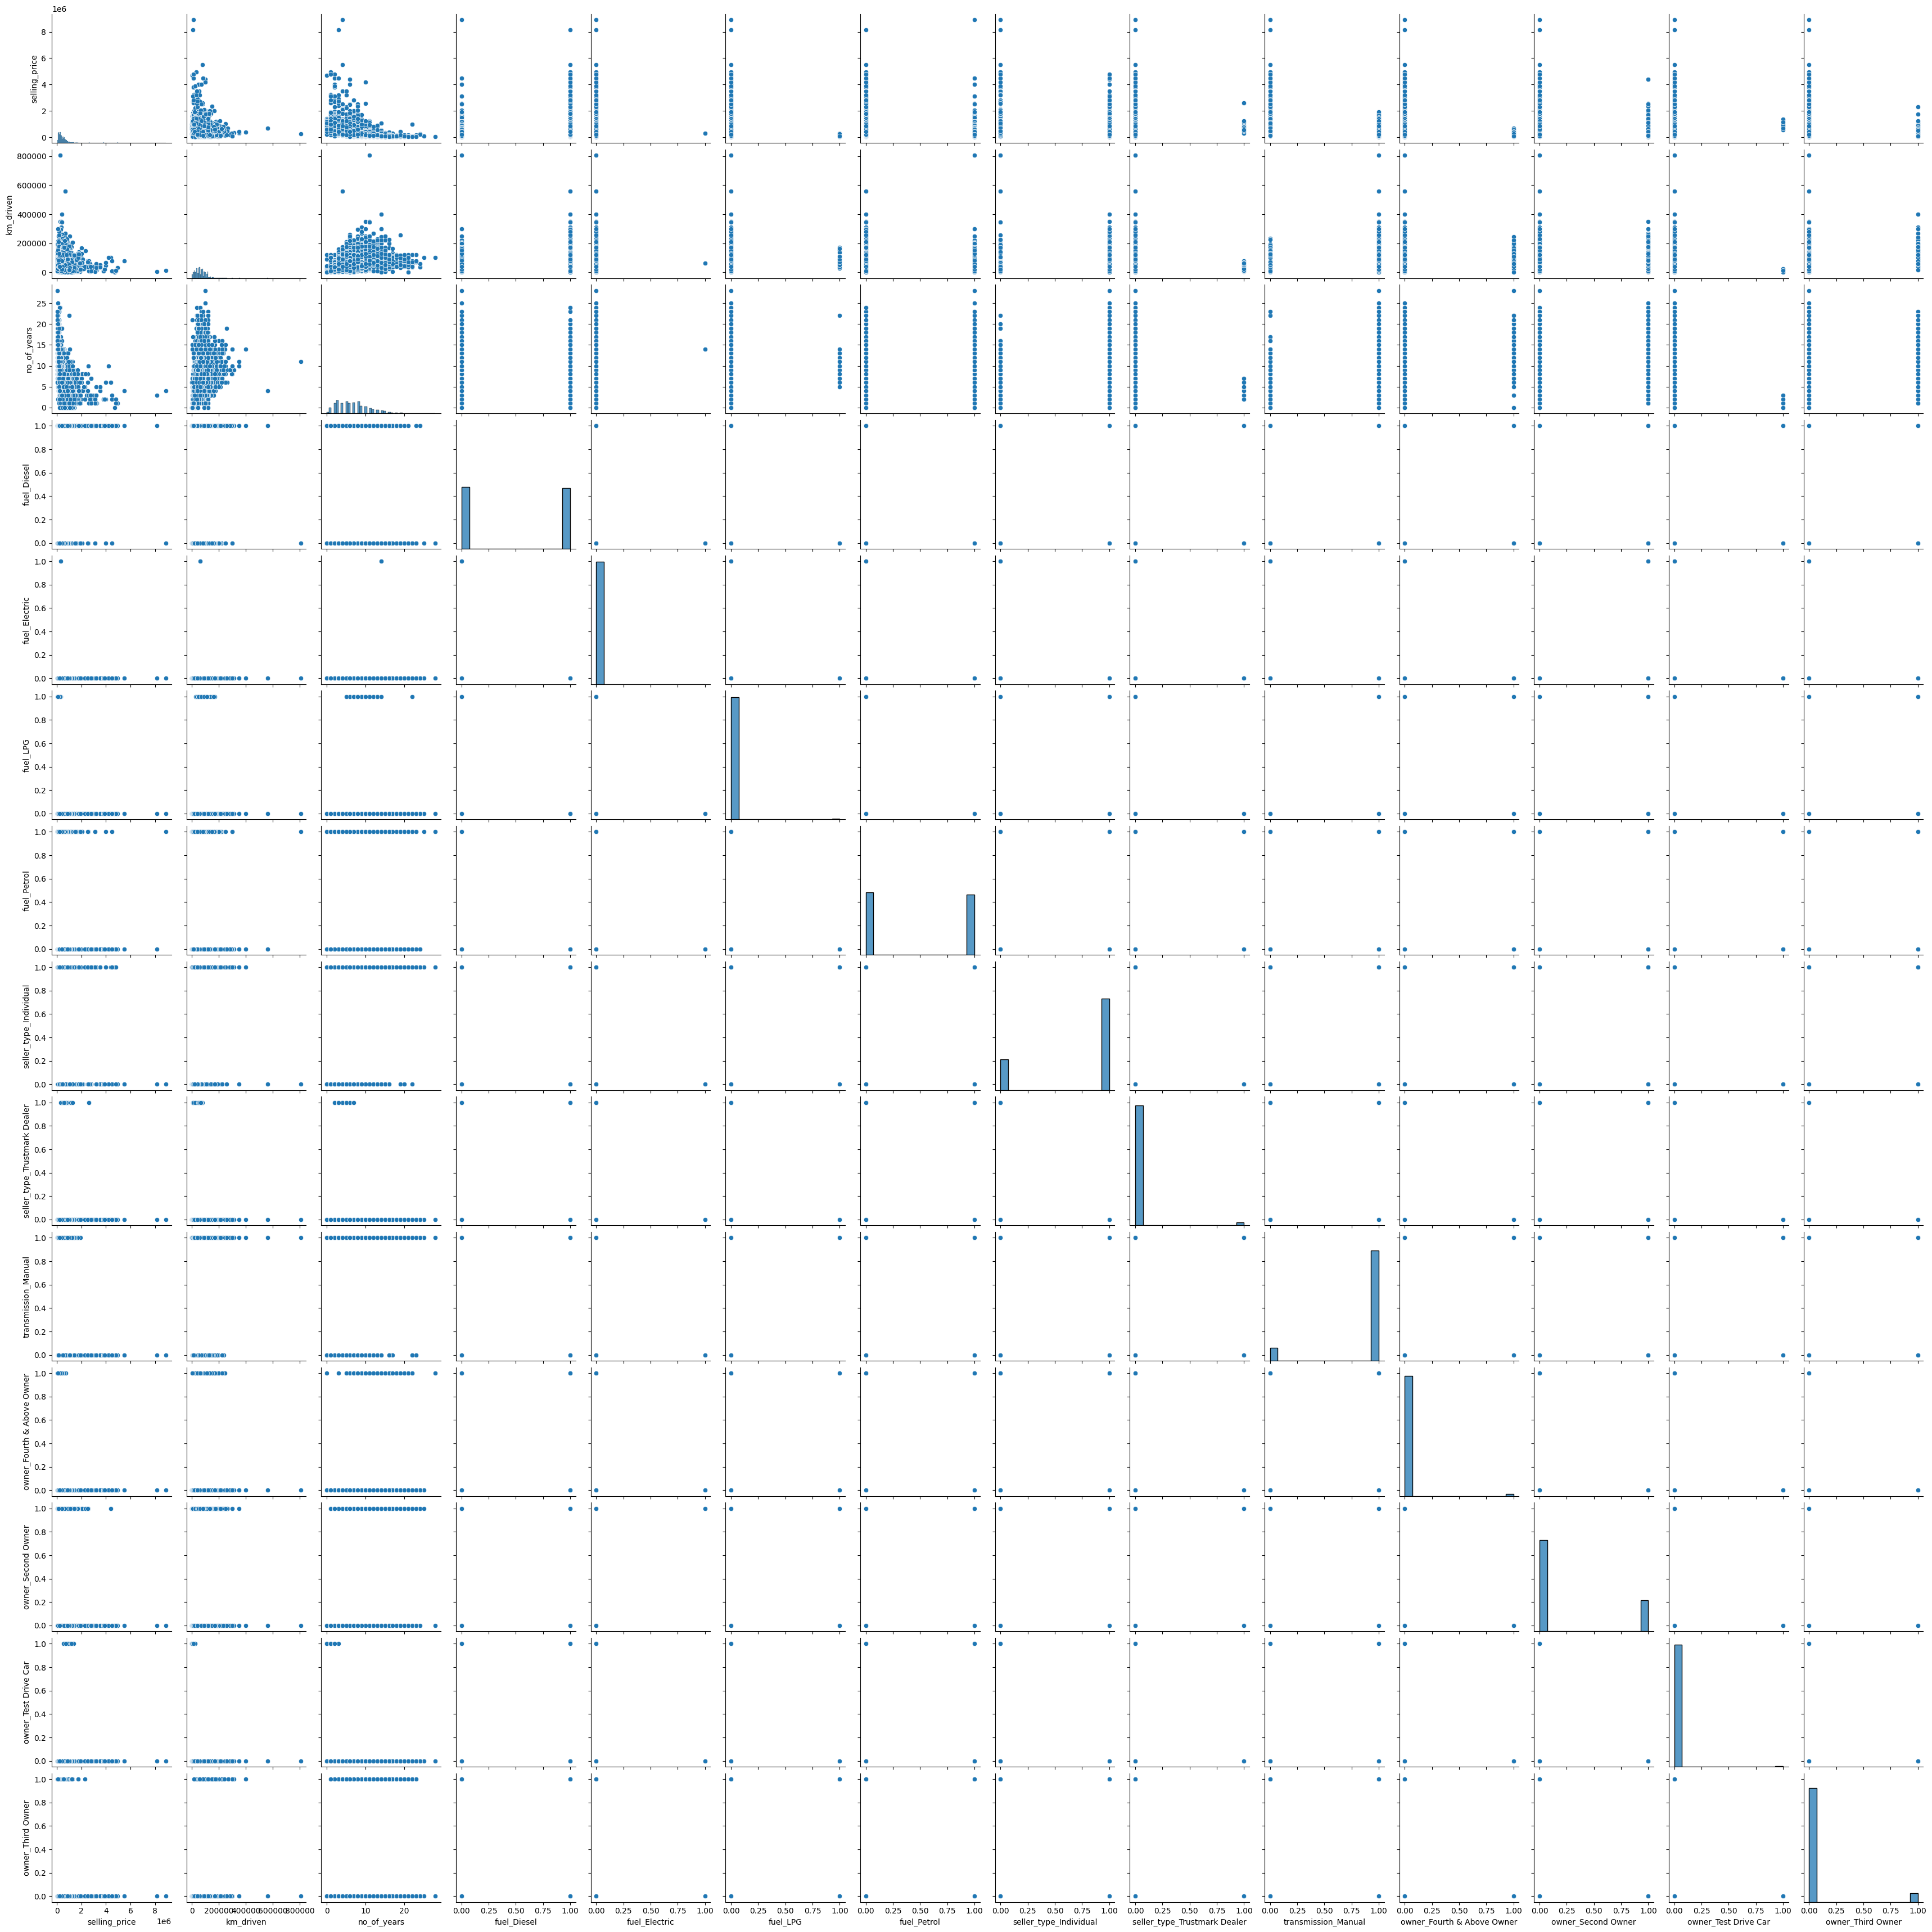

In [18]:
sns.pairplot(new_data)

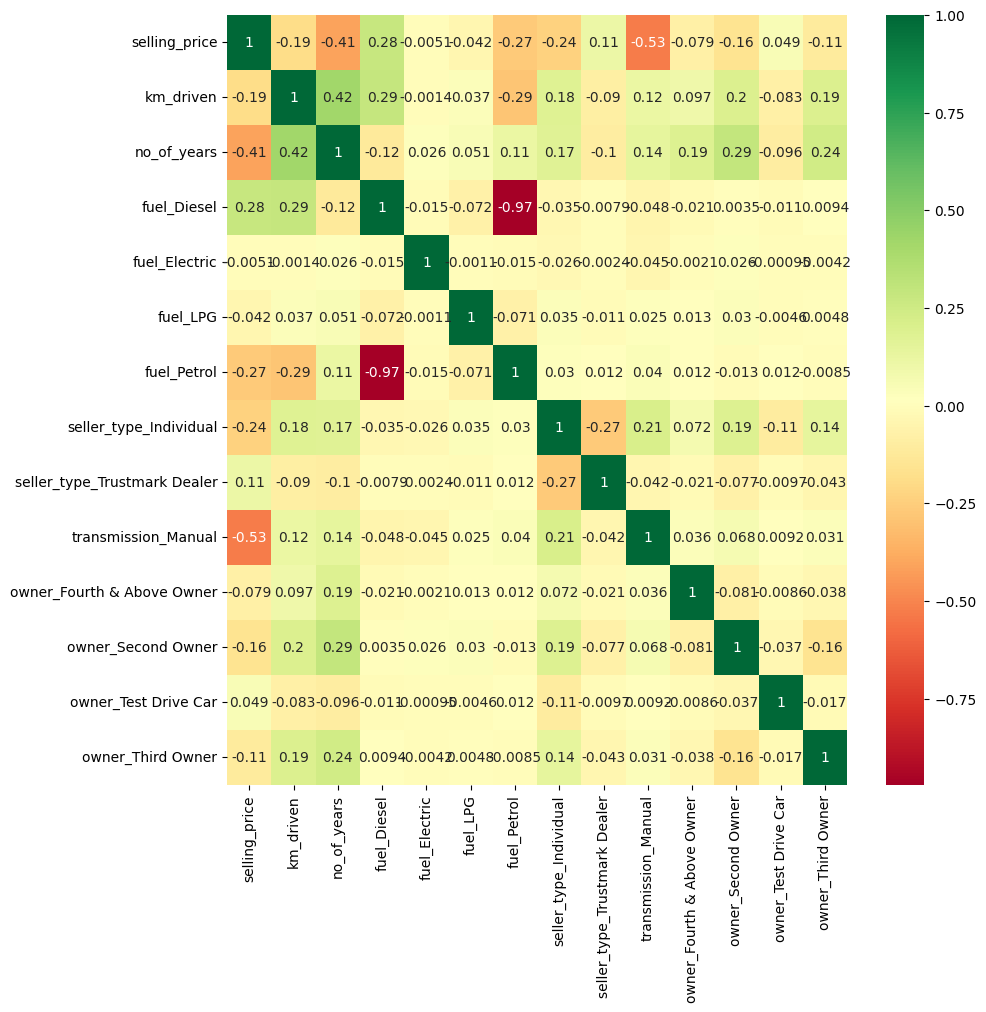

In [19]:
cormat = new_data.corr()
top_corr_feat = cormat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(new_data[top_corr_feat].corr(), annot=True, cmap='RdYlGn')

# **Selecting the features and targets**

In [20]:
X = new_data.iloc[:,1:]
y = new_data.iloc[:,0]

In [21]:
X.head()

,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [22]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

# **Feature Selection (Feature Importance)**

In [23]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
model.feature_importances_

array([2.41824820e-01, 2.50901723e-01, 1.29931841e-01, 4.93079037e-05,
       2.65496985e-05, 1.89938465e-04, 4.92021612e-02, 8.09964293e-03,
       2.92831472e-01, 8.90333372e-04, 2.10168971e-02, 5.87918737e-04,
       4.44739417e-03])

Top 5 features w.r.t targets

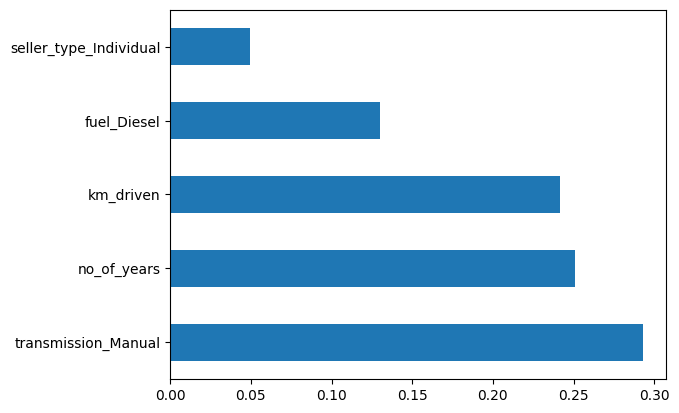

In [25]:
important_feature = pd.Series(model.feature_importances_, index=X.columns)
important_feature.nlargest(5).plot(kind="barh")
plt.show()

# **Splitting the dataset using train_test_split()**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [27]:
X_train

,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
159,175000,5,1,0,0,0,1,0,1,0,0,0,0
4334,170000,8,1,0,0,0,1,0,1,0,0,0,0
1657,110000,14,0,0,0,1,1,0,1,0,0,0,0
2188,66521,5,0,0,0,1,0,1,1,0,0,0,0
581,41000,4,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,58500,7,1,0,0,0,0,0,0,0,0,0,0
3264,110000,8,1,0,0,0,1,0,1,0,0,0,0
1653,22000,4,0,0,0,1,1,0,1,0,0,0,0
2607,70000,5,1,0,0,0,1,0,1,0,0,0,0


# **Choosing an appropriate model**

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
reg=DecisionTreeRegressor()

In [ ]:
model = RandomForestRegressor()

1. Performing  the Hyperparameter Tuning to get the best parameters for the RandomizedSearchCV

In [30]:
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# No. of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = model,
                               param_distributions = random_grid,
                               scoring = 'neg_mean_squared_error',
                               n_iter = 10,
                               cv = 5,
                               verbose = 2,
                               random_state = 42,
                               n_jobs = 1)

# **Training the model**

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

1. Check what's the best parameter that we have got for our model

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

2. Predicting the X_test

In [ ]:
predicted_y_values = rf_random.predict(X_test)

# **Checking how well our model has predicted/performed**

1. Using Scatterplot

In [31]:
reg.predict(X_test)

array([ 500000.        , 1580000.        ,  300000.        ,
       4950000.        ,  125000.        ,  145000.        ,
        450000.        ,  258750.        ,  740000.        ,
        460499.8       ,  229999.        ,  365625.        ,
        825000.        ,  375000.        ,  280000.        ,
        670000.        ,  401250.        ,  222222.22222222,
        110000.        ,  485714.28571429,   85000.        ,
        492999.8       ,  615000.        ,  383142.71428571,
        355000.        ,  500000.        ,  300000.        ,
        454250.        ,  612100.        ,  362833.33333333,
        343333.33333333,  527500.        ,  295000.        ,
        685666.66666667,  170000.        ,  350000.        ,
        375000.        ,  120000.        ,  250000.        ,
        411428.57142857,  190000.        ,  557500.        ,
        425000.        , 2750000.        ,  422500.        ,
        240000.        ,  153333.33333333,  396666.66666667,
        510000.        ,

In [32]:
y_pred=reg.predict(X_test)

In [34]:
target = pd.DataFrame({"Actual":y_test,"predicted":y_pred})

In [37]:
target.head()

,Actual,predicted
2089,465000,500000.0
1077,1580000,1580000.0
1495,150000,300000.0
555,4950000,4950000.0
2615,125000,125000.0


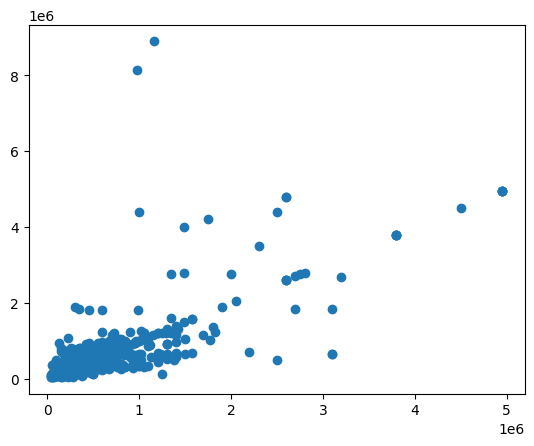

In [38]:
# plt.scatterplot(y_test, predicted_y_values)
plt.scatter(y_test, y_pred)

2. Using distplot

<ipython-input-39-48d7c6e228d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test- y_pred )


<Axes: xlabel='selling_price', ylabel='Density'>

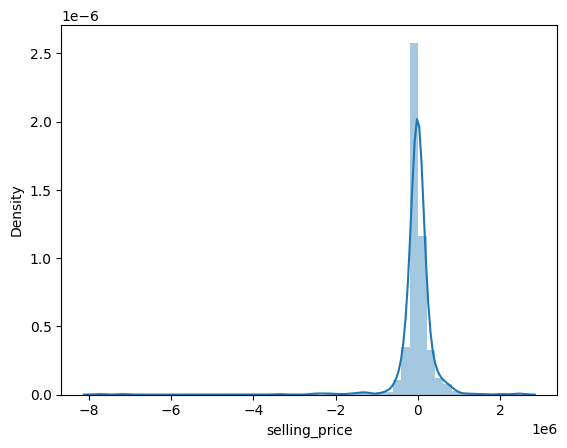

In [39]:
sns.distplot(y_test- y_pred )

<Axes: >

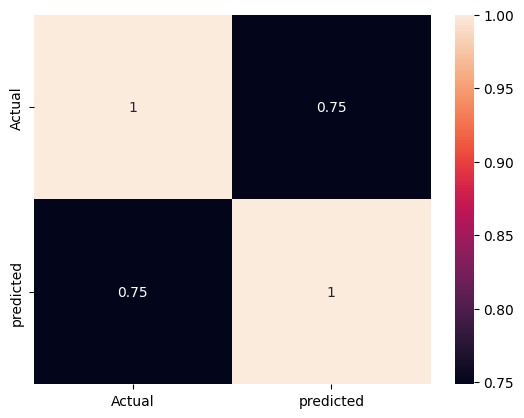

In [41]:
sns.heatmap(target.corr(),annot=True)

# **Checking Accuracy**

In [42]:
r2_score(y_test, y_pred)

0.3116689014061764

In [ ]:
radju = 1 - (((1-accuracy)*(len(new_data)-1))/(len(new_data) - len(new_data.columns) -1))

In [ ]:
radju

0.9210357503810275

In [ ]:
df5 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predicted_y_values})
df5.head()

,Real Values,Predicted Values
223,8.25,7.019065
150,0.50,0.512128
226,5.25,4.958293
296,9.50,8.359202
52,18.00,12.327346
